In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('raw_depression_dataset.csv')
data.head(10)

/tmp/ipykernel_1706/2534145879.py:1: DtypeWarning: Columns (7,8,9,10,11,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('raw_depression_dataset.csv')


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.9,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170700 entries, 0 to 170699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     170700 non-null  int64  
 1   Name                                   170700 non-null  object 
 2   Gender                                 169976 non-null  object 
 3   Age                                    170700 non-null  float64
 4   City                                   169942 non-null  object 
 5   Working Professional or Student        170700 non-null  object 
 6   Profession                             125632 non-null  object 
 7   Academic Pressure                      34099 non-null   object 
 8   Work Pressure                          136207 non-null  object 
 9   CGPA                                   35308 non-null   object 
 10  Study Satisfaction                     34090 non-null   

In [4]:
data.describe()

,id,Age,Work/Study Hours,Depression
count,170700.000000,170700.000000,170700.000000,170700.000000
mean,85349.500000,55.432730,6.565975,0.182115
std,49276.989813,371.804856,6.310709,0.385940
min,0.000000,-50.000000,-10.000000,0.000000
25%,42674.750000,29.000000,3.000000,0.000000
50%,85349.500000,42.000000,6.000000,0.000000
75%,128024.250000,51.000000,10.000000,0.000000
max,170699.000000,10000.000000,100.000000,1.000000


In [5]:
num_cols = data.select_dtypes(['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(['object']).columns.tolist()
print('Numeric columns: ', num_cols)
print('Categorical columns: ', cat_cols)


Numeric columns:  ['id', 'Age', 'Work/Study Hours', 'Depression']
Categorical columns:  ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']


In [6]:
data.isnull().sum().sort_values(ascending=False)

Study Satisfaction                       136610
Academic Pressure                        136601
CGPA                                     135392
Profession                                45068
Work Pressure                             34493
Job Satisfaction                          33911
City                                        758
Dietary Habits                              757
Sleep Duration                              750
Gender                                      724
Degree                                      723
Financial Stress                            701
Age                                           0
Name                                          0
id                                            0
Working Professional or Student               0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [7]:
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(data[col].value_counts(dropna=False))


Value counts for Name:
Name
Rohan       3844
Aarav       2826
Rupak       2639
Aaradhya    2486
Anvi        2477
            ... 
Ayhan          1
Irit           1
Harshaun       1
Ishaesh        1
Shivak         1
Name: count, Length: 422, dtype: int64

Value counts for Gender:
Gender
Male                 90356
Female               73677
NaN                    724
M                      435
Lady                   434
MALE                   422
Other                  409
Girl                   408
FEMALE                 407
female                 405
Dude                   401
male                   400
F                      395
Man                    379
m                      368
prefer not to say      366
Woman                  366
Boy                    348
Name: count, dtype: int64

Value counts for City:
City
Kalyan         7728
Patna          6905
Vasai-Virar    6692
Kolkata        6603
Ahmedabad      6574
               ... 
vadODaRa          1
LucKnow           1
VarANasI   

# Data Understanding

## Data Dictionary for Dataset
| Variable name | Role | Type | Group | Range of values | Demographic | Description |
|:---|:---|:---|:---|:---|:---|:---|
| id | Identifier | Integer | Identification | Unique integer values | No | Unique identifier for each record or participant in the dataset. |
| Name | Feature | Object (String) | Identification | Names (e.g., Aaradhya, Vivan, Yuvraj) | No | Name of the survey participant. |
| Gender | Feature | Object (String) | Demographic | Male, Female, Lady, man, etc. | Yes | Gender of the participant. |
| Age | Feature | Float (Numeric) | Demographic | Numeric values (e.g., -1 to 999) | Yes | Age of the participant (may include decimal values). |
| City | Feature | Object (String) | Demographic | City names (e.g., Ludhiana, Varanasi, etc) | Yes | City where the participant resides. |
| Working Professional or Student | Feature | Object (String) | Socioeconomic | Working Professional, Student | Yes | Current status of the participant (Employed or Student). |
| Profession | Feature | Object (String) | Socioeconomic | Job titles (e.g., Chef, Teacher, Architect) | No | Occupation of the participant (relevant only for Working Professionals). |
| Academic Pressure | Feature | Float (Numeric) | Stressors | Numeric scale (e.g., 1.0 to 5.0), NaN for non-students | No | Perceived level of Academic Pressure (on a scale from 1.0 to 5.0, where 5.0 is the highest). |
| Work Pressure | Feature | Float (Numeric) | Stressors | Numeric scale (e.g., 1.0 to 5.0), NaN for non-professionals | No | Perceived level of Work Pressure (on a scale from 1.0 to 5.0, where 5.0 is the highest). |
| CGPA | Feature | Float (Numeric) | Academic | Numeric values (e.g., 6.00 to 10.00), NaN for non-students | No | Cumulative Grade Point Average (CGPA) of the student/participant. |
| Study Satisfaction | Feature | Float (Numeric) | Wellbeing | Numeric scale (e.g., 1.0 to 5.0), NaN for non-students | No | Level of Satisfaction with Study (on a scale from 1.0 to 5.0, where 5.0 is the highest). |
| Job Satisfaction | Feature | Float (Numeric) | Wellbeing | Numeric scale (e.g., 1.0 to 5.0), NaN for non-professionals | No | Level of Satisfaction with Job (on a scale from 1.0 to 5.0, where 5.0 is the highest). |
| Sleep Duration | Feature | Object (String) | Lifestyle | Less than 5 hours, 5-6 hours, 7-8 hours, More than 8 hours | No | Average daily Sleep Duration reported by the participant. |
| Dietary Habits | Feature | Object (String) | Lifestyle | Healthy, Moderate, Unhealthy | No | Participant's self-reported Dietary Habits. |
| Degree | Feature | Object (String) | Education | Degree names (e.g., BHM, LLB, B.Pharm) | Yes | Highest Degree or educational qualification attained. |
| Have you ever had suicidal thoughts ? | Feature | Object (String) | Psychological | Yes, No | No | A binary response indicating if the participant has ever had suicidal thoughts. |
| Work/Study Hours | Feature | Float (Numeric) | Lifestyle | Numeric values (e.g., 0.0 to 12.0) | No | Number of hours spent working or studying per day. |
| Financial Stress | Feature | Float (Numeric) | Stressors | Numeric scale (e.g., 1.0 to 5.0) | No | Perceived level of Financial Stress (on a scale from 1.0 to 5.0, where 5.0 is the highest). |
| Family History of Mental Illness | Feature | Object (String) | Family/Medical | Yes, No | No | A binary indicator for whether there is a Family History of Mental Illness. |
| Depression | Target | Integer | Outcome | 0 (No Depression), 1 (Depression) | No | Target variable indicating the outcome: 1 if the participant is classified as having signs of Depression, 0 otherwise. |

## Summary Table of Observations and Data Preprocessing Actions

| Variable Group | Variable Name | Type | Observations | Recommended Actions |
| :--- | :--- | :--- | :--- | :--- |
| **Identification** | `id` | Integer | Unique identifier, clean. | Retain as **index**. Do not include in the model. |
| | `Name` | Object (String) | Personal names, no predictive value. | **Drop** this variable for privacy and irrelevance. |
| **Demographic** | `Gender` | Object (String) | Inconsistent casing (e.g., 'Male', 'man', 'Lady', 'Female'). | **Standardize casing** (e.g., convert all to lowercase) to ensure consistency. |
| | `Age` | Float (Numeric) | Float data type. | Check for **outliers**. Convert to **Integer** if all values are whole numbers. |
| | `City` | Object (String) | Categorical, potentially high cardinality, inconsistent casing. | **Standardize casing** (e.g., Title Case) and check for spelling errors. Consider **grouping** cities if cardinality is too high. |
| | `Degree` | Object (String) | Categorical, values may be inconsistent ('Class 12', 'Unknown'). | **Normalize** inconsistent values. Apply **Encoding** (One-Hot or Label) for modeling. |
| **Socioeconomic** | `Working Professional or Student` | Object (String) | Clear binary classification. | Apply **Binary Encoding** (e.g., 1 or 0). |
| | `Profession` | Object (String) | **Structural Missing** values (NaN) for 'Student' entries. Inconsistent casing. | **Handle Missing Values:** Impute NaNs for students with 'None' or 'Student N/A'. **Standardize casing**. |
| **Stressors** | `Academic Pressure` | Float (Numeric) | Scale 1-5. **Structural Missing** for 'Working Professional' entries. | **Handle Missing Values:** Impute NaNs with **0** or **-1** to explicitly denote no academic pressure. |
| | `Work Pressure` | Float (Numeric) | Scale 1-5. **Structural Missing** for 'Student' entries. | **Handle Missing Values:** Impute NaNs with **0** or **-1** to explicitly denote no work pressure. |
| | `Financial Stress` | Float (Numeric) | Scale 1-5. Appears complete across participants. | Check for completeness. Consider **Normalization** if using distance-based models. |
| **Academic** | `CGPA` | Float (Numeric) | **Structural Missing** for 'Working Professional' entries. | **Handle Missing Values:** Impute NaNs with **0** or **-1**. |
| **Wellbeing** | `Study Satisfaction` | Float (Numeric) | Scale 1-5. **Structural Missing** for 'Working Professional' entries. | **Handle Missing Values:** Impute NaNs with **0** or **-1**. |
| | `Job Satisfaction` | Float (Numeric) | Scale 1-5. **Structural Missing** for 'Student' entries. | **Handle Missing Values:** Impute NaNs with **0** or **-1**. |
| **Lifestyle** | `Sleep Duration` | Object (String) | Clear ordinal categories (time ranges). | Apply **Ordinal Encoding** based on the chronological order of sleep duration. |
| | `Dietary Habits` | Object (String) | Ordinal categories ('Healthy', 'Moderate', 'Unhealthy'). | Apply **Ordinal Encoding** (e.g., 3, 2, 1). |
| | `Work/Study Hours` | Float (Numeric) | Numeric hours reported. | Check for **outliers** and validate the significance of 0.0 values. |
| **Education** | `Degree` | Object (String) | Categorical, values may be inconsistent ('Class 12', 'Unknown'). | **Normalize** inconsistent values. Apply **Encoding (OHE/Label)** for modeling. |
| **Family/Medical** | `Family History of Mental Illness` | Object (String) | Binary variable ('Yes', 'No'). | **Binary Encoding** (Yes=1, No=0). |
| **Psychological** | `Have you ever had suicidal thoughts ?` | Object (String) | Binary variable ('Yes', 'No'). | **Binary Encoding** (Yes=1, No=0). |
| **Outcome** | `Depression` | Integer | Binary target variable (0, 1). | **Check for Class Imbalance** between the two classes (0 and 1) and address if necessary (e.g., using SMOTE or sampling techniques). |

=uw7w## Analysis of factors influencing depression in reality

---

#### 1. Direct and Strong Influencing Factors

These variables typically serve as the strongest root causes or indicators, often showing high correlation coefficients:

##### `Financial Stress`
* **Reason:** This is one of the most **common and persistent** stressors in modern life. Financial pressure creates a feeling of **loss of control**, future insecurity, and often leads to prolonged anxiety, which can easily develop into depression.

##### `Job Satisfaction / Study Satisfaction`
* **Reason:** Work or studies consume a significant portion of an individual's time and often define their self-worth. Prolonged dissatisfaction in this area erodes **self-esteem** and sense of purpose, serving as a direct precursor to feelings of hopelessness—a core symptom of depression.

##### `Family History of Mental Illness`
* **Reason:** This is a crucial **biological and genetic** risk factor. If an individual has a family history of mental illness, their risk of developing depression is significantly higher due to an inherent biological vulnerability.

---

#### 2. Indirect Influencing Factors

These variables reflect behaviors and habits that increase the body and mind's susceptibility to vulnerability, often co-occurring with or resulting from stress:

##### `Sleep Duration`
* **Reason:** Poor sleep (too little or too much) is both a **symptom** and a **cause** of mood disorders. Chronic sleep deprivation impairs emotional regulation, increases stress hormones (cortisol), and negatively affects brain function, thereby escalating the risk of depression.

##### `Dietary Habits`
* **Reason:** An unhealthy diet can impact gut microbiota and the production of neurotransmitters (like Serotonin), cause inflammation, and indirectly affect mental health.

##### `Work/Study Hours`
* **Reason:** While long hours don't always cause depression, a persistent lack of **Work-Life Balance** leads to **burnout** and reduces time for social activities or recovery, contributing to overall high stress levels.

---

#### 3. Other Contextual Factors

These factors often act as moderators or are indirectly related, influencing how the primary stressors are experienced:

##### `Academic Pressure / Work Pressure`
* **Reason:** These are specific, localized stressors. Although they are positively correlated with depression, their influence is often **lower** than generalized Financial Stress, as they represent only a segment of total life pressure.

##### `Age`, `Gender`, `City`, `Degree`
* **Reason:** These demographic variables are not direct causes; rather, they define the **context** in which stressors are perceived. For example, financial pressure might be experienced differently across different age groups (**Age**) or geographic locations (**City**).

##### `CGPA` (Cumulative Grade Point Average)
* **Reason:** CGPA is primarily related to depression through the **Academic Pressure** or **Study Satisfaction** variables. A low CGPA can increase pressure and reduce satisfaction, but the score itself is not the primary psychological driver of depression.

# Check missing values

                                       Missing    Percent
id                                           0   0.000000
Name                                         0   0.000000
Gender                                     724   0.424136
Age                                          0   0.000000
City                                       758   0.444054
Working Professional or Student              0   0.000000
Profession                               45068  26.401875
Academic Pressure                       136601  80.024019
Work Pressure                            34493  20.206796
CGPA                                    135392  79.315759
Study Satisfaction                      136610  80.029291
Job Satisfaction                         33911  19.865847
Sleep Duration                             750   0.439367
Dietary Habits                             757   0.443468
Degree                                     723   0.423550
Have you ever had suicidal thoughts ?        0   0.000000
Work/Study Hou

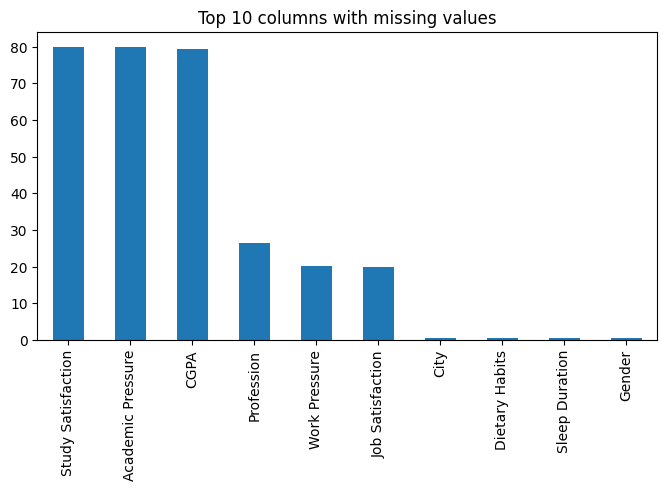

In [8]:
missing = data.isnull().sum()
missing_percent = (missing / len(data) * 100).sort_values(ascending=False)
print(pd.concat([missing, missing_percent], axis=1, keys=['Missing', 'Percent']))

missing_percent.head(10).plot(kind='bar', figsize=(8,4), title="Top 10 columns with missing values")
plt.show()


The dataset contains systematic missingness, rather than random missingness. Specifically, several variables related to academic or study-related information—such as CGPA, Academic Pressure, and Study Satisfaction—show missing rates around 79–80%. Conversely, work-related variables like Work Pressure and Job Satisfaction also exhibit substantial missingness (around 20%). This pattern can be explained by the structure of the variable “Working Professional or Student.” This variable splits respondents into two distinct groups: Working Professionals and Students, each with different relevant attributes. Therefore:

- Working Professionals typically do not provide academic-related information. Therefore, their values for CGPA, Academic Pressure, Study Satisfaction, and similar variables are systematically missing.

- Students, on the other hand, do not provide work-related information. As a result, variables such as Work Pressure and Job Satisfaction tend to be missing for respondents in the student group.

Therefore, the absence of values is not due to data collection errors but is an inherent characteristic of the survey design.

Understanding this pattern is crucial for selecting appropriate data preprocessing strategies. Instead of imputing these values arbitrarily, it is more meaningful to treat the academic-related and professional-related variables as group-specific fields. Subsequent data handling and modeling should take this structural missingness into account to avoid introducing bias.

Because of this systematic missing pattern, we need to separate our data for students and working professionals.

In [9]:
student_data = data[data["Working Professional or Student"] == "Student"]
worker_data = data[data["Working Professional or Student"] == "Working Professional"]

# Numeric columns

Distribution of numeric columns student


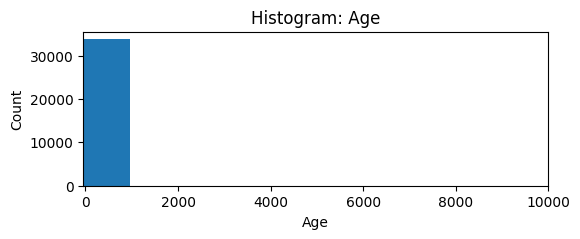

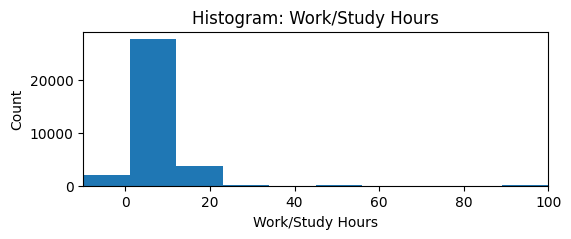

Distribution of numeric columns worker


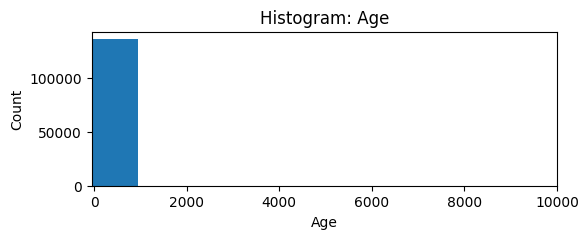

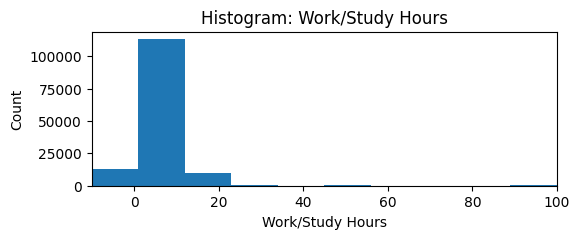

In [10]:
for idx, d in enumerate([student_data, worker_data]):
    print(f"Distribution of numeric columns {'student' if idx==0 else 'worker'}")
    for col in ['Age', 'Work/Study Hours']:
        plt.figure(figsize=(6,2)) 
        plt.hist(d[col], bins=10)
        plt.xlim(d[col].min(), d[col].max())
        plt.title(f'Histogram: {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


In [11]:
for idx, d in enumerate([student_data, worker_data]):
    print(f"Analysis of Skewness of data for {'student' if idx==0 else 'worker'}")
    for col in num_cols:
        print("====", col, "====")
        print("Notnull:", d[col].notnull().sum(), "/", len(d))
        print("Min:", d[col].min(), "Max:", d[col].max(), "Mean:", d[col].mean())
        print("Skew:", d[col].skew())


Analysis of Skewness of data for student
==== id ====
Notnull: 33924 / 33924
Min: 2 Max: 170684 Mean: 85581.32112958378
Skew: -0.006723840207923635
==== Age ====
Notnull: 33924 / 33924
Min: -50.0 Max: 10000.0 Mean: 41.69694021931376
Skew: 25.90778090011764
==== Work/Study Hours ====
Notnull: 33924 / 33924
Min: -10.0 Max: 100.0 Mean: 7.417492041032897
Skew: 8.006250148119081
==== Depression ====
Notnull: 33924 / 33924
Min: 0 Max: 1 Mean: 0.5852493809692253
Skew: -0.3460799428938762
Analysis of Skewness of data for worker
==== id ====
Notnull: 136776 / 136776
Min: 0 Max: 170699 Mean: 85292.00233959174
Skew: 0.001664909913219627
==== Age ====
Notnull: 136776 / 136776
Min: -50.0 Max: 10000.0 Mean: 58.839562496344385
Skew: 26.63934143973074
==== Work/Study Hours ====
Notnull: 136776 / 136776
Min: -10.0 Max: 100.0 Mean: 6.354777153886647
Skew: 7.993881095749104
==== Depression ====
Notnull: 136776 / 136776
Min: 0 Max: 1 Mean: 0.08212698134175586
Skew: 3.044001464022644


Boxplots for student


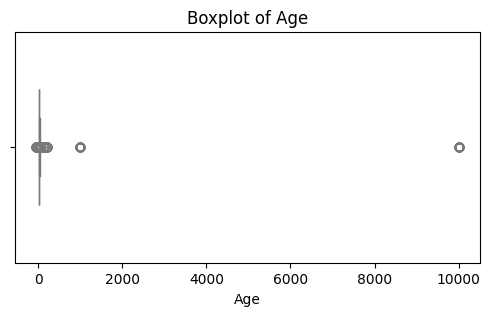

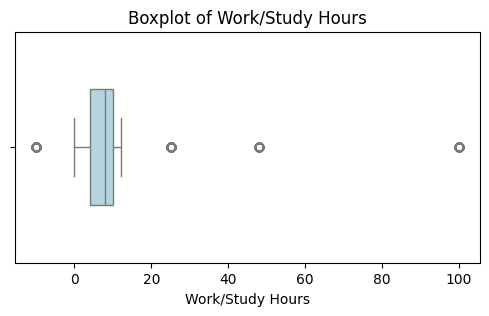

Boxplots for worker


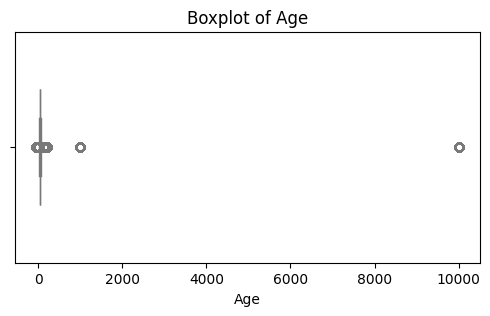

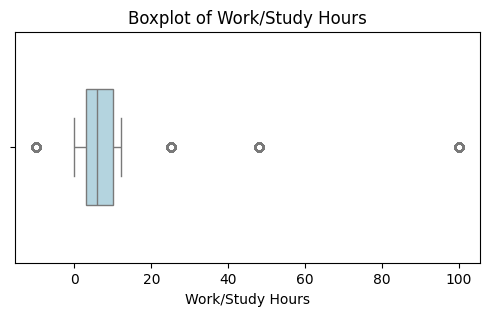

In [12]:
for idx, d in enumerate([student_data, worker_data]):
    print(f"Boxplots for {'student' if idx==0 else 'worker'}")
    for col in ['Age', 'Work/Study Hours']:
        plt.figure(figsize=(6,3))

        sns.boxplot(
            data=d,
            x=d[col],
            width=0.5,        
            color="lightblue" 
        )

        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.show()


## Age:

Boxplot:

- The boxplot is heavily stretched to the right due to the presence of extreme outliers, including values close to 10,000 years old

- There are also negative age values, which are impossible

- The actual box (IQR) is very small and compressed toward the left because the extreme outliers dominate the scale.

Histogram:

- Most values fall between 0 and 100, but the histogram becomes almost meaningless because the outliers (e.g., 10,000) stretch the x-axis drastically.

- This makes it impossible to visually understand the true distribution

=> Summary: The Age variable

- Contains physically impossible values (negative ages, ages >100).

- Heavy skew due to extreme outliers.

- Histogram becomes uninformative because of the distorted scale.

## Work/Study Hours

Boxplot:

- Multiple outliers are visible at 20, 40, 60, and even 100 hours, which exceed the number of hours in a day

- Some values are negative, another invalid case.

- The majority of the data appears between 0–12 hours, but the outliers compress the box on the left.

Histogram:

- Most observations lie between 0–12 hours.

- Outliers stretch the x-axis, causing the histogram to lose interpretability.

=> Summary: The Work/Study Hours variable contains logical errors:

- Negative hours.

- Hours greater than 24 (or even 16 for realistic study/work schedules).

- Extreme outliers distort all plots.

### => Chắc dùng boxplot để nhận biết outliers cho Age và Work/Study Hours

# Object columns but numeric columns

In [13]:
num_like_object_cols = ['Academic Pressure', 'Work Pressure', 'CGPA', 
        'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']

for idx, d in enumerate([student_data, worker_data]):
    print(f"Other numerical columns of {'student' if idx==0 else 'worker'}")
    for col in num_like_object_cols:
        print(f"{col}:")
        print(d[col].unique()) 
        print("\n")

Other numerical columns of student
Academic Pressure:
[5.0 2.0 3.0 4.0 1.0 nan '1.0' '4.0' '2.0' '5.0' '3.0' 'Error' '#VALUE!'
 '??' 'Not Available' 'Twenty' 'High' 'Low' 'Null']


Work Pressure:
[nan 5.0 2.0 'Twenty' 'Low' 'High' '??' '#VALUE!' 'Null' 'Not Available'
 'Error']


CGPA:
[8.97 5.9 7.03 5.59 8.13 5.7 9.54 8.04 9.79 8.38 6.1 7.04 8.52 5.64 8.58
 6.51 7.25 7.83 9.93 8.74 6.73 5.57 8.59 7.1 6.08 5.74 9.86 6.7 6.21 5.87
 6.37 9.72 5.88 9.56 6.99 5.24 9.21 7.85 6.95 5.86 7.92 9.66 8.94 9.71
 7.87 5.6 7.9 5.46 6.79 8.7 7.38 8.5 7.09 9.82 8.89 7.94 9.11 6.75 7.53
 9.49 9.01 7.64 5.27 6.0 9.44 5.75 7.51 9.05 6.38 8.95 9.88 5.32 6.27 7.7
 8.1 9.59 8.96 5.51 7.43 8.79 9.95 5.37 6.86 8.32 9.74 5.66 7.48 8.23 8.81
 6.03 5.56 5.68 5.14 7.61 6.17 8.17 9.87 8.75 6.16 9.5 7.99 5.67 8.92 6.19
 5.76 6.25 5.11 5.58 5.65 9.89 8.03 6.61 9.41 8.64 7.21 8.28 6.04 9.13
 8.08 9.96 5.12 8.35 7.07 9.6 9.24 8.54 8.78 8.93 8.91 9.04 6.83 5.85 7.74
 6.41 8.9 7.75 7.88 5.42 7.52 7.68 8.4 9.39 6.84 5.99

The columns: Academic Pressure, Work Presure, Study Satisfaction, Job Satisfaction, Financial Stress have the scale from 1 to 5 and are numeric columns. However, the actual values include a mixture of:

- Numeric values stored as strings -> inconsistent format

- Non-numeric textual entries (High, Low) -> manual entry errors or improper data integration

- Error tokens commonly produced by systems

- Missing-value markers written as text

- Given our assumption that students should only fill student-only columns like Academic Pressure..., there are multiple instances with both student-only values and worker-only values 

CGPA column also has above mentioned errors, but it has another issue like impossible values (outliers) 

Find invalid values for student


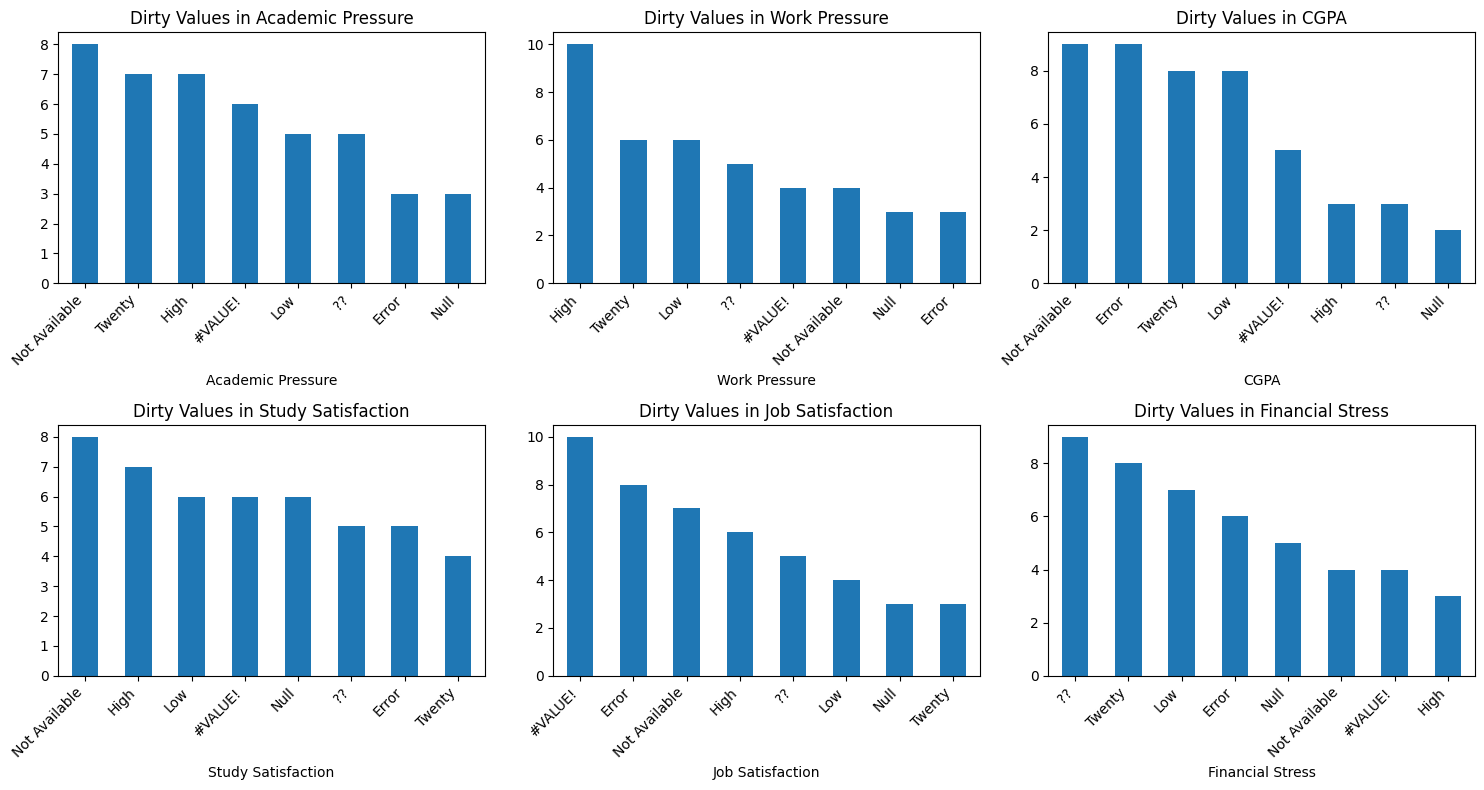

Find invalid values for worker


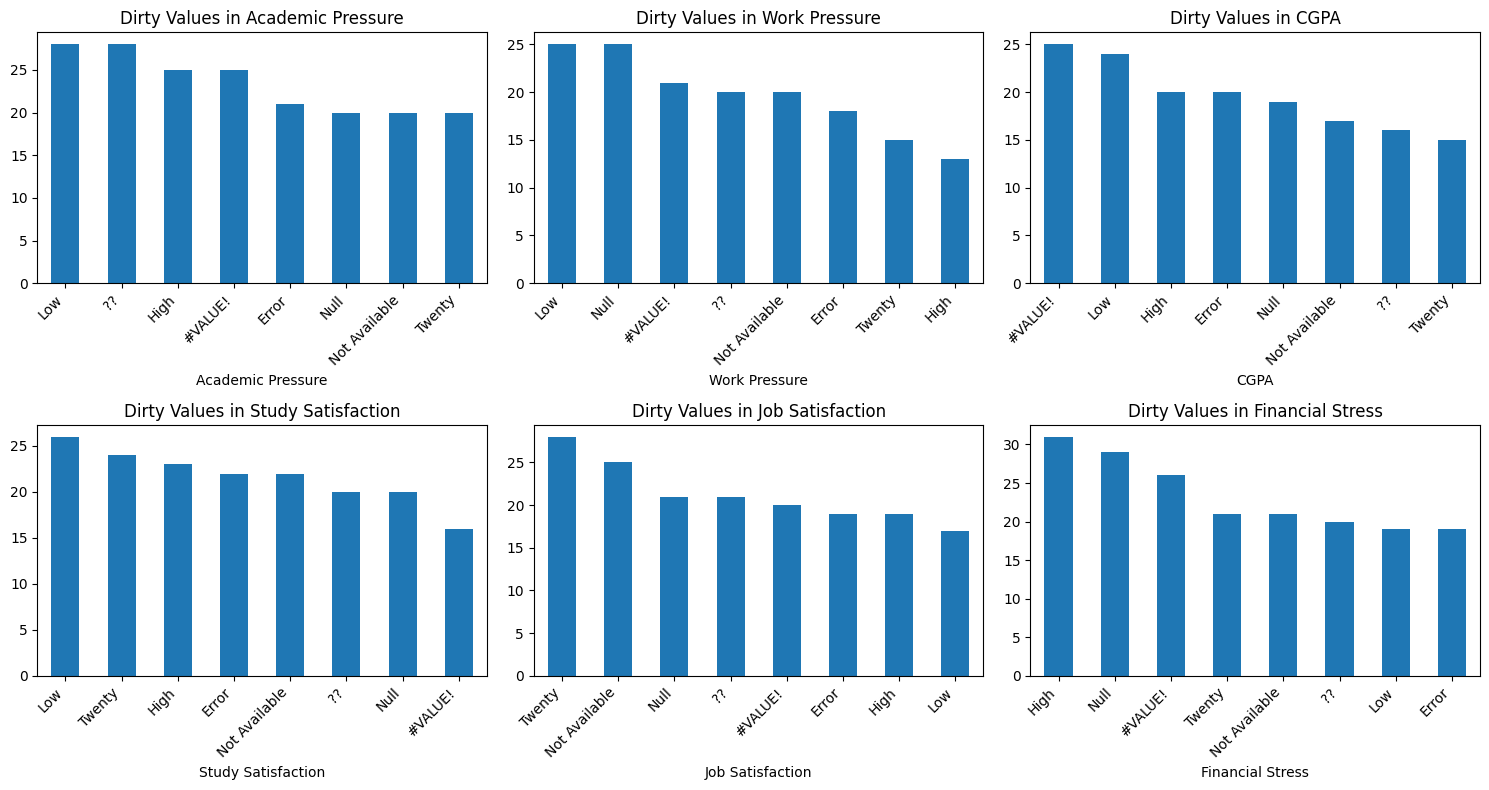

In [14]:
for data_idx, d in enumerate([student_data, worker_data]):
    # MOVED: Create a new figure for each dataset (student and worker)
    plt.figure(figsize=(15, 8))
    
    idx = 1
    print(f"Find invalid values for {'student' if data_idx==0 else 'worker'}")
    
    for col in num_like_object_cols:
        dirty_mask = pd.to_numeric(d[col], errors='coerce').isna() & d[col].notna()
        dirty_values = d.loc[dirty_mask, col].astype(str)

        # Plotting remains the same
        plt.subplot(2, 3, idx) 
        if len(dirty_values) > 0:
            dirty_values.value_counts().plot(kind='bar')
            plt.title(f"Dirty Values in {col}")
            plt.xticks(rotation=45, ha='right')
        else:
            plt.title(f"No Dirty Values in {col}")
            plt.text(0.5, 0.5, "None", ha='center', va='center')

        idx += 1

    plt.tight_layout()
    # plt.show() displays the figure before moving to the next loop iteration
    plt.show()

Histogram for CGPA after numeric conversion in {'student' if data_idx==0 else 'worker'}


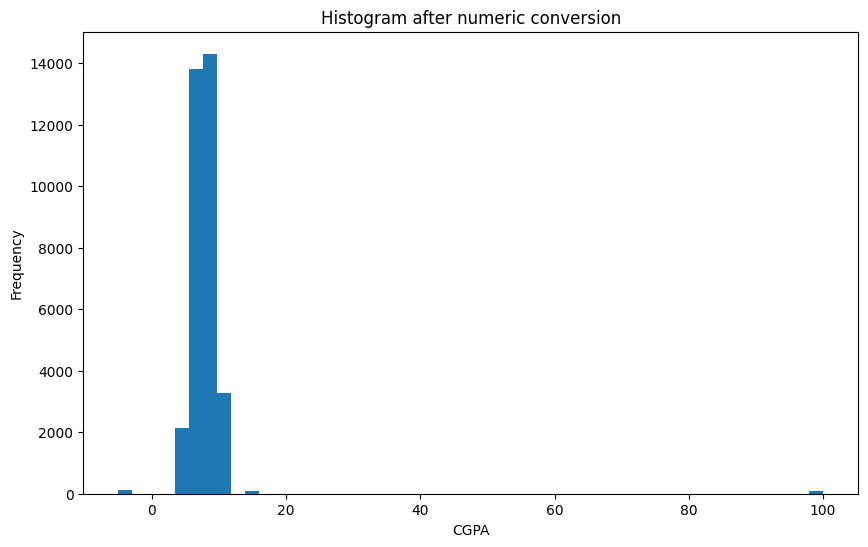

Histogram for CGPA after numeric conversion in {'student' if data_idx==0 else 'worker'}


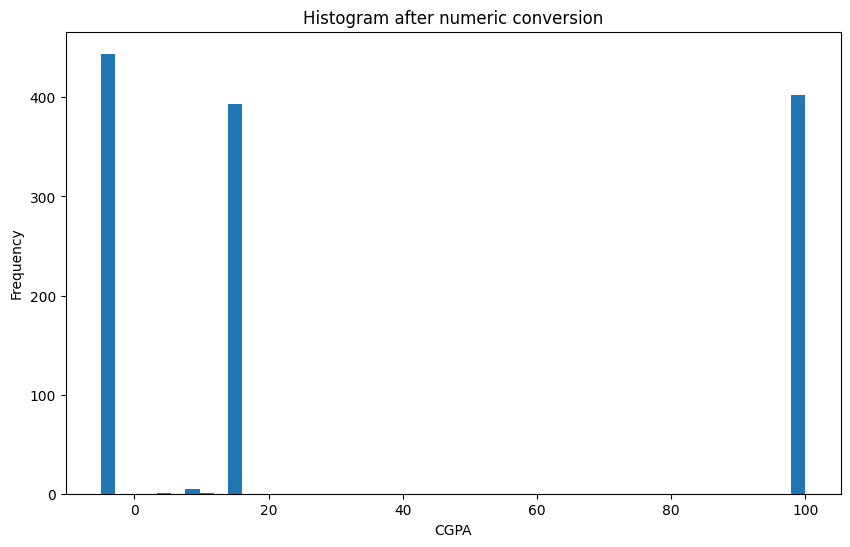

In [15]:
for data_idx, d in enumerate([student_data, worker_data]):
    plt.figure(figsize=(10,6))
    print("Histogram for CGPA after numeric conversion in {'student' if data_idx==0 else 'worker'}")
    cgpa_num = pd.to_numeric(d['CGPA'], errors='coerce')
    plt.hist(cgpa_num.dropna(), bins=50)
    plt.title("Histogram after numeric conversion")
    plt.xlabel("CGPA")
    plt.ylabel("Frequency")
    plt.show()


The histograms compare distribution of CGPA between students and workers, after numeric conversion. As we can see, there are a lot of instances of workers with CGPA, with 400 observations of CGPA nearly 100. 

## Categorical columns:

We print top 10 values being most popular 

In [16]:
cate_cols = ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [17]:
for col in cate_cols:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].value_counts(dropna=False))
    print("\n")


Name: 422 unique values
Name
Rohan       3844
Aarav       2826
Rupak       2639
Aaradhya    2486
Anvi        2477
            ... 
Ayhan          1
Irit           1
Harshaun       1
Ishaesh        1
Shivak         1
Name: count, Length: 422, dtype: int64


Gender: 17 unique values
Gender
Male                 90356
Female               73677
NaN                    724
M                      435
Lady                   434
MALE                   422
Other                  409
Girl                   408
FEMALE                 407
female                 405
Dude                   401
male                   400
F                      395
Man                    379
m                      368
prefer not to say      366
Woman                  366
Boy                    348
Name: count, dtype: int64


City: 2054 unique values
City
Kalyan         7728
Patna          6905
Vasai-Virar    6692
Kolkata        6603
Ahmedabad      6574
               ... 
vadODaRa          1
LucKnow           1
VarANas

Name column:

- This variable has no analytical value for modeling and should be excluded.

Gender column:

- Inconsistency in labeling

- Requires standardization into a small set of categories: Male, Female, Other

City column:

- Many entries differ by case (E.g. Ahmedabad and aHMedabAd) -> poor data entry control and significant noise, requires normalization (lowercasing, spelling correction).

Profession:

- Many missing values

- Some noise or invalid entries: "M.Ed", "Pranav", "unveil"...

Sleep Duration:

- Highly inconsistent category formatting:

+ Standard categories: "Less than 5 hours", "7-8 hours"

+ Invalid values: "45", "Pune", "Sleep_Duration"

+ Nonsense ranges: "45-48 hours", "55-66 hours"

-> Noise

- Needs re-categorization into a clean set such as: < 5 hours, 5-6 hours, 6-7 hours, 7-8 hours, > 8 hours.....

-> Outliers and non-realistic durations should be removed.

Dietary Habits

- Expected: Healthy, Unhealthy, Moderate

- Contains unrelated or impossible values: "Gender", "Male", "Electrician", "Vegas", "M.Tech"

-> Clean to three main abovementioned categories 

Degree

- Some noise values: 5.56, Ritik, 29

-> Requires normalization and removal of invalid entries

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6527928-bbf4-4c9a-8760-1f30ce0e5ba3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>